Setup
==

First, let us import all necessary libraries for this one

In [1]:
# PyTorch and numpy
import torch
import numpy as np
# Building neural network layers
import torch.nn as nn
# Optimization algorithms for training neural networks
import torch.optim as optim
# DataLoader for creating data loading iterators
from torch.utils.data import DataLoader
# Computer vision datasets and transforms
import torchvision
# Transforms for data preprocessing and augmentation
import torchvision.transforms as transforms
# A popular library for plotting and visualization
import matplotlib.pyplot as plt
# Library for matrix operation
import numpy as np
# Scipy signal library
import scipy.signal

# Typing
from typing import Optional

In [2]:
#@title Utilities

def is_same_tensor(result: torch.Tensor,
                   ref: torch.Tensor,
                   tol: Optional[float]=None) -> bool:
  """
  Check if two tensors are the same.

  Args:
    result: Results by your code.
    ref: Ground truth result.

  Return:
    Whether result and ref are the same.
  """
  if (not isinstance(result, torch.Tensor) or
      not isinstance(ref, torch.Tensor)):
    return False
  if result.dtype != ref.dtype:
    result = result.to(ref.dtype)
  if tol is not None:
    return torch.allclose(result, ref, rtol=0, atol=tol)
  else:
    return torch.equal(result, ref)

# Problem A. Type conversion and precision

## 1. Let us create a matrix and check its storage.

### Question A.1. Create matrix in CPU.

Create 3 matrices with different shape and types.

* a: dimension 3x4, float32. The value should range from 1 to 12.
* b: dimension dimension 32x64x4, float16. The value should range from 1 ... 8192.
* c: Slicing of b. Only keep the first 32 columns. Other dimensions are unchanged.

In [ ]:
#####################
# Your code goes here
#####################
a = torch.reshape(torch.linspace(1, 12, 12), (3, 4))
b = torch.reshape(torch.linspace(1, 8192, 8192,
                  dtype=torch.float16), (32, 64, 4))
c = b[:, :32, :]

Print the memory cost of each matrix above (in Bytes)

In [ ]:
#####################
# Your code goes here
#####################
a_momery = a.element_size() * a.nelement()
b_momery = b.element_size() * b.nelement()
c_momery = c.element_size() * c.nelement()
print(f'Tensor a consumes {a_momery} bytes')
print(f'Tensor b consumes {b_momery} bytes')
print(f'Tensor c consumes {c_momery} bytes')

Tensor a consumes 48 bytes
Tensor b consumes 16384 bytes
Tensor c consumes 8192 bytes


### Question A.2 Create matrix in GPU

Create 2 matrices in GPU.

* d: dimension 32x64x4, float16. The value should range from 1 ... 8192.
* e: Slicing of d. Only keep the first 32 columns. Other dimensions are unchanged.

In [ ]:
#####################
# Your code goes here
#####################

d = torch.reshape(torch.linspace(1, 8192, 8192,
                  dtype=torch.float16, device='cuda'), (32, 64, 4))
e = d[:, :32, :]

Print the memory cost of d and e.

Also, try using actual memory cost of d and e together using torch.cuda.memory_allocated.

Note that this value is different from the same of mem cost of d and e itself. Why?

Hint: Sometimes, the calculate of GPU mem is not precise. Consider to use torch.cuda.empty_cache() to remove uncleaned mem.

In [ ]:
#####################
# Your code goes here
#####################
torch.cuda.empty_cache()
d_mem_cost = d.element_size() * d.nelement()
e_mem_cost = e.element_size() * e.nelement()
mem_cost_using_memory_allocated = torch.cuda.memory_allocated()

print(f'Tensor d consumes {d_mem_cost} bytes')
print(f'Tensor e consumes {e_mem_cost} bytes')
print(f'Using memory_allocated, the actual memory consumption of d and e is '
      f'{mem_cost_using_memory_allocated}, this is different from sum d and '
      f'e consumptions, which is {d_mem_cost + e_mem_cost} bytes')
print('This is because d and e shares the same memory when only doing slicing operation')

Tensor d consumes 16384 bytes
Tensor e consumes 8192 bytes
Using memory_allocated, the actual memory consumption of d and e is 16384, this is different from sum d and e consumptions, which is 24576 bytes
This is because d and e shares the same memory when only doing slicing operation


## Floating-point calculation accuracy.

In this question, let us check how accuracy affects the calculation
results.

We will calculate two problems: summation and softmax, using float64,
float32, and float16. Then, we will show that float16 has relatively
low accuracy. And at the end, we will show a trick to improve accuracy.

### Question A.3 Summation

Let us first create a random matrix using float16

In [ ]:
torch.manual_seed(1234)
a = torch.rand(1000, dtype=torch.float16)

Calculate the ground truth summation using float64.

In [ ]:
a_f64 = a.to(torch.float64)
a_gt = torch.sum(a_f64)

print(f'summation if the array using float64 is {a_gt}')

summation if the array using float64 is 513.48291015625


Next, let us try to calculate summation using float16 and float32.

Please:
* Convert tensor to float16/32
* Sum it using torch.sum

In [ ]:
#####################
# Your code goes here
#####################
a_f32 = a.to(torch.float32)
a_f32_sum = torch.sum(a_f32)

print(f'summation if the array using float32 is {a_f32_sum}, '
      f'this is different from float64 result {a_gt}')

a_f16 = a.to(torch.float16)
a_f16_sum = torch.sum(a_f16)

print(f'summation if the array using float16 is {a_f16_sum}, '
      f'this is different from float64 result {a_gt}')

summation if the array using float32 is 513.48291015625, this is different from float64 result 513.48291015625
summation if the array using float16 is 513.5, this is different from float64 result 513.48291015625


Let us try to improve accuracy.

Here you just use a forloop to explicitly enumerate each element (for i in range(1000) and sum them together. You can try to use float64 as the type for accumulator.

### Question A.4 Softmax

Softmax of an array is very common in deep learning. Torch provide it a function for calculating it.

Check this link for more details of Softmax:

https://en.wikipedia.org/wiki/Softmax_function

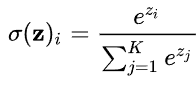

First, let us calculate ground truth softmax result using float32.

In [ ]:
torch.manual_seed(1234)
a = torch.rand(100, dtype=torch.float32) * 10
softmax_gt = torch.softmax(a, dim=0)

a_f16 = a.to(torch.float16)

Let us try to implement ourselves. Do not use torch.softmax or any
equivalent function. Also, do not use forloop.

In [ ]:
def cal_simple_softmax(x: torch.Tensor) -> torch.Tensor:
  #####################
  # Your code goes here
  # Please also add docstring
  #####################
  """
  Calculate softmax result without using torch.softmax and forloop

  Args:
    x: a tensor
  Return:
    softmax version of x
  """
  x_exp = torch.exp(x - max(x))
  return x_exp / sum(x_exp)

In [ ]:
def cal_simple_softmax(x: torch.Tensor) -> torch.Tensor:
  x_exp = torch.exp(x)
  return x_exp / sum(x_exp)

Testing

**Please do run this block before submission, but do not change it**. If you change it, you will get no mark for this question.

In [ ]:
softmax_myresult = cal_simple_softmax(a)
assert is_same_tensor(softmax_gt, softmax_myresult, 1e-6)

But if you try that on float16, it is not correct.

In [ ]:
softmax_simple = cal_simple_softmax(a_f16)
err_softmax_simple = torch.norm(softmax_simple - softmax_gt)
print(f'The error of simple softmax using f16 is {err_softmax_simple}')

The error of simple softmax using f16 is 0.2395230531692505


The error above should be normally larger than 0.1 (but should be less than 0.4, check your implementation if it is larger than 0.4).

It is even worse when a has large values. Try the following block.



In [ ]:
torch.manual_seed(1234)
a2 = (torch.rand(100, dtype=torch.float32) * 30).to(torch.float16)
softmax2_simple = cal_simple_softmax(a2)
print(f'Because of overflow or underflow, there are '
      f'{torch.count_nonzero(softmax2_simple.isnan())} elements'
       ' are inf')

Because of overflow or underflow, there are 64 elements are inf


To solve this problem, let us try a trick called LogSumExp.

Please read this artical to see how to LogSumExp and try that for softmax.

https://en.wikipedia.org/wiki/LogSumExp#log-sum-exp_trick_for_log-domain_calculations

**Hint**, the key is to subtract max(x) from x before exp.

**Note**, You CANNOT convert all vectors to float32 and calculate. You still need use float16 for major calculation, but think about how to improve the precision.

You can also try to use torch.logsumexp.

In [ ]:
def cal_precise_softmax(x: torch.Tensor) -> torch.Tensor:
  #####################
  # Your code goes here
  # Please also add docstring
  #####################
  """
  Calculate softmax result using LogSumExp

  Args:
    x: a tensor
  Return:
    softmax version of x
  """
  LogSumExp = max(x) + torch.log(sum(torch.exp(x - max(x))))
  return torch.exp(x - LogSumExp)

Test. **Do not change the block below.**

In [ ]:
torch.manual_seed(1234)
a1 = torch.rand(100, dtype=torch.float32) * 10
a2 = torch.rand(1000, dtype=torch.float32) * 10
a3 = torch.rand(100, dtype=torch.float32) * 30

for a_f32 in [a1, a2, a3]:
  a_f16 = a_f32.to(torch.float16)
  softmax_gt = torch.softmax(a_f16, dim=0)
  softmax_precise = cal_precise_softmax(a_f16)
  assert is_same_tensor(softmax_precise, softmax_gt, 1e-3)

print('Test successs')

Test successs


# Problem B. Deep learning training

## Step 1. Load the training data

First, let us check what is the mean and variance of FashionMNIST.

**Why we need to know this information?**

Because majority of network prefers a normalized input. If the input is not normalized, the training may converge slower, or even failed.

### Step 1.1 Estimate the mean and variance

Let us use the first few samples of the training set.

#### First, let us download the dataset (no question)



In [14]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', # The dataset will be downloaded from the webserver to the local machine, this is where it stores
    train=True, # We will download the training set
    download=True,
)
train_data = train_dataset.train_data.to(torch.float32) / 255 # Convert it to float32
train_labels = train_dataset.train_labels

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 342kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.21MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.8MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


#### Question B.1. Next, let us check how the dataset looks

In [16]:
print('train_dataset.train_data is a',
   f'{type(train_dataset.train_data)}. Its dimension is',
   f'{train_dataset.train_data.shape}, and its type is {train_dataset.train_data.dtype}')
print()
print(f'The first dimension is number of samples, which is {train_dataset.train_data.shape[0]}')
print()
print('The 2nd and 3rd dimensions are height and width, which means the image resolution is '
   f'{train_dataset.train_data.shape[1]}x{train_dataset.train_data.shape[2]}')

train_dataset.train_data is a <class 'torch.Tensor'>. Its dimension is torch.Size([60000, 28, 28]), and its type is torch.uint8

The first dimension is number of samples, which is 60000

The 2nd and 3rd dimensions are height and width, which means the image resolution is 28x28


The dataset also contains labels, which is what network should output

In [17]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
print('train_dataset.train_labels is',
   f'{type(train_labels)}, and its dimension is',
   f'{train_labels.shape}, and its type is {train_labels.dtype}')
print()
print('The label is only one dimension, and the first dimension is the number samples, which is the same as train_data')
print()

train_dataset.train_labels is <class 'torch.Tensor'>, and its dimension is torch.Size([60000]), and its type is torch.int64

The label is only one dimension, and the first dimension is the number samples, which is the same as train_data



In [19]:
###################
# Your code goes here
###################

sample_labels = train_labels[:10]
print(f'Here are the labels for the first 10 samples: {sample_labels}')
print('Each number is an index to the class names')
print('So the actual class names of these 10 samples should be:')
for i in range(10):
  print(f'{class_names[sample_labels[i]]}')

Here are the labels for the first 10 samples: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])
Each number is an index to the class names
So the actual class names of these 10 samples should be:
Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal


Let us visualize the images in the dataset.

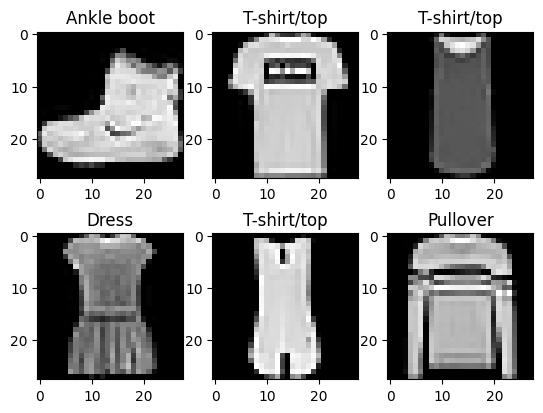

In [ ]:
###################
# Your code goes here
###################

for i in range(6):
  plt.subplot(2, 3, i+1)
  im = train_data[i, :, :] # Load the i-th training image
  label = class_names[train_labels[i]] # Load the i-th training label
  plt.imshow(im, cmap='gray', vmin=0.0, vmax=1.0)
  plt.title(label)

And we can also show the histogram of these images

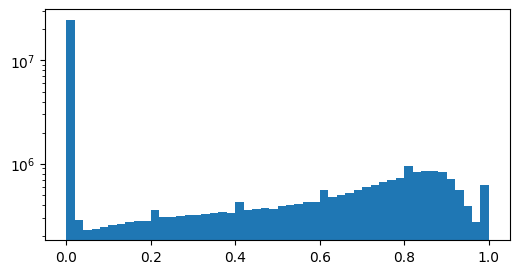

In [ ]:
plt.figure(figsize=(6, 3))
result = plt.hist(train_data.flatten(), bins=50)
plt.yscale('log')

#### Question B.2 Finally, we need to get the mean and standard deviation (std).

**Hint**: Torch has built function to get mean and standard deviation. The mean should be around 0.28, and std should be around 0.35.

In [21]:
###################
# Your code goes here
###################

mean_train = torch.mean(train_data)
std_train = torch.std(train_data)
print(f'mean = {mean_train}, std = {std_train}')

mean = 0.2860405743122101, std = 0.3530242443084717


### Step 1.2. Define the data transformation (No questions)

In [22]:
# Define transformations for the training and test sets

transform_train = transforms.Compose([
    # Convert input to a float tensor. It will automatically converts uint8
    # image to float32 image.
    transforms.ToTensor(),
    # normalize it to zero-mea, unit variance.
    transforms.Normalize((mean_train,), (std_train,))
])

# The transformation applied to the testing is the same as training
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean_train,), (std_train,))
])

In [23]:
# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Let us visualize the loaded data again.

Note that:
* The image after loading is a floating image
* The image is normalized, where the value is distributed around 0

In each batch, the batch_image dimension is torch.Size([64, 1, 28, 28])
In each batch, the batch_label dimension is torch.Size([64])


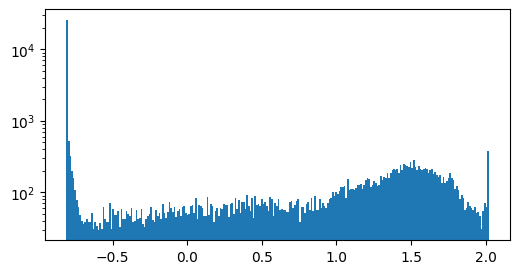

In [ ]:
for batch_image, batch_label in train_loader:
  print(f'In each batch, the batch_image dimension is {batch_image.shape}')
  print(f'In each batch, the batch_label dimension is {batch_label.shape}')
  plt.figure(figsize=(6, 3))
  result = plt.hist(batch_image.flatten(), bins=256)
  plt.yscale('log')
  break

## Step 2. Define other training options (no questions)

For the first training project, CPU is enough.

Still, if you like to (and has enough quota), you can always run it with GPU.

In [4]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


Also, we need to define the loss function.

In [5]:
loss_fn = nn.CrossEntropyLoss()

## Step 3. Define the network structure

### Question B.3

Let us create the first model, which is a MLP. Please use:
* 2 linear layers
* The dimension of intermediate layer is 32
* The last layer should be a linear

In [7]:
class MLPNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # Flatten the 28x28 image into a 784-element vector
    self.flatten = nn.Flatten()
    # Define a MLP model here
    self.mlp = nn.Sequential(
      ###################
      # Your code goes here
      ###################
      nn.Linear(784, 32), nn.Linear(32, 10)
    )
  def forward(self, x):
    # Pass the input through the layers
    x = self.flatten(x)
    logits = self.mlp(x)
    return logits

model = MLPNetwork().to(device)
print('==== This is the model we created ====')
print(model)

==== This is the model we created ====
MLPNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (mlp): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=10, bias=True)
  )
)


Calculate the number of trainable parameters.

For example, for a nn.Linear(10, 20), the weight matrix has 10x20=200 parameters, and the bias has 20 parameters.

Hint: you can `model.parameters()` to iterate all parameters.

In [8]:
def calc_model_params(model: nn.Module) -> int:
  #####################
  # Your code goes here
  # Add docstring
  #####################
  """
  Calculate number of parameters of a model

  Args:
    model: a built model
  Return:
    number of parameter of the model
  """
  return sum(p.numel() for p in model.parameters())
print(f'There are {calc_model_params(model)} parameters in this model')

There are 25450 parameters in this model


## Step 4: Training and Evaluation Loops (Although no questions, but make it runs correctly)

First, let us define a training loop iterates over all the batches of the training dataset.

In [9]:
def train_one_epoch(
    dataloader: torch.utils.data.DataLoader,
    model: nn.Module,
    loss_fn: nn.Module,
    optimizer: optim.Optimizer,
    loss_print_iter: int=100
  ) -> None:
  num_train_samples = len(dataloader.dataset)

  # Set the model to the training mod
  model.train()

  for batch_index, (image, label) in enumerate(dataloader):
    image, label = image.to(device), label.to(device)

    # Compute prediction error
    pred = model(image)
    loss = loss_fn(pred, label)

     # Clear gradient for next iterations.
    optimizer.zero_grad()

    # Backpropagation

    # Computes gradients of the loss with respect to all parameters
    # in the model that require gradients, storing them in the .grad
    # attribute of each parameter.
    loss.backward()

    # Updates all the model parameters using the gradients computed in the
    # previous step, moving parameters in the direction that reduces the
    # loss.
    optimizer.step()



    if batch_index % loss_print_iter == 0:
      loss, trained_samples = loss.item(), (batch_index + 1) * image.shape[0]
      print(f'loss: {loss:>7f} '
            f'[{trained_samples:>5d}/{num_train_samples:>5d}] ')

  return

Also, defines an evaluation loop checks the model's performance on the test dataset.

In [10]:
def test_all_samples(
    dataloader: torch.utils.data.DataLoader,
    model: nn.Module,
    loss_fn: nn.Module
) -> None:
  model.eval()  # Set the model to evaluation mode
  num_testing_samples = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Disable gradient calculation for inference
  with torch.no_grad():
    for image, label in dataloader:
      image, label = image.to(device), label.to(device)
      pred = model(image)
      test_loss += loss_fn(pred, label).item()
      correct += (pred.argmax(1) == label).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= num_testing_samples
  print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, '
        f'Avg loss: {test_loss:>8f} \n')

At last, let us run the training. In each epoch:
* We loop all training samples and update the network `train_one_epoch`

In [ ]:
model = MLPNetwork().to(device)
epochs = 3   # Number of training epochs
optimizer = torch.optim.SGD(
  model.parameters(),    # All trainable parameters.
  lr=1e-4                # Learning rate
)

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  # Run one training epoch
  train_one_epoch(train_loader, model, loss_fn, optimizer)
  # After each epoch, run testing on all samples
  test_all_samples(test_loader, model, loss_fn)

print("Training done!")

Epoch 1
-------------------------------
loss: 2.409817 [   64/60000] 
loss: 2.260381 [ 6464/60000] 
loss: 2.203629 [12864/60000] 
loss: 2.181422 [19264/60000] 
loss: 1.973853 [25664/60000] 
loss: 2.027029 [32064/60000] 
loss: 1.961381 [38464/60000] 
loss: 2.011360 [44864/60000] 
loss: 1.897051 [51264/60000] 
loss: 1.863383 [57664/60000] 
Test Error: 
 Accuracy: 45.3%, Avg loss: 1.802983 

Epoch 2
-------------------------------
loss: 1.755986 [   64/60000] 
loss: 1.864602 [ 6464/60000] 
loss: 1.770764 [12864/60000] 
loss: 1.733606 [19264/60000] 
loss: 1.721016 [25664/60000] 
loss: 1.681514 [32064/60000] 
loss: 1.507826 [38464/60000] 
loss: 1.589773 [44864/60000] 
loss: 1.597398 [51264/60000] 
loss: 1.485807 [57664/60000] 
Test Error: 
 Accuracy: 53.8%, Avg loss: 1.508682 

Epoch 3
-------------------------------
loss: 1.520429 [   64/60000] 
loss: 1.457401 [ 6464/60000] 
loss: 1.538476 [12864/60000] 
loss: 1.533677 [19264/60000] 
loss: 1.487825 [25664/60000] 
loss: 1.309404 [32064/6000

At last, let us test this model on real images.

torch.Size([64, 1, 28, 28])


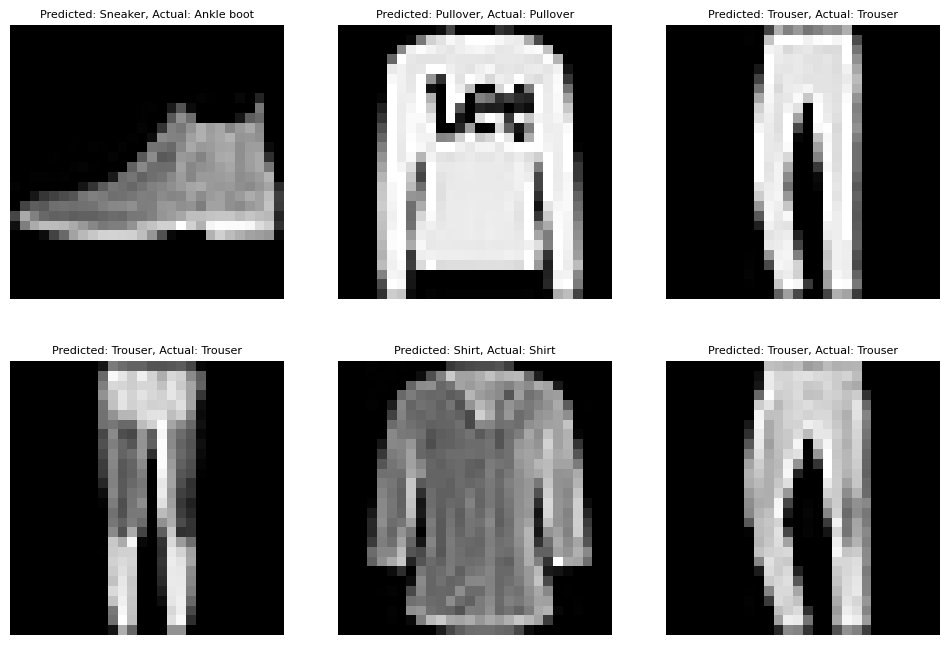

In [ ]:
model.eval()
with torch.no_grad():
  for image, label in test_loader:
    print(image.shape)
    image = image.to(device)
    model_output = model(image[:6, ...])
    predicted_label = [class_names[x] for x in model_output.argmax(1)]
    actual_label = [class_names[x] for x in label[:6]]
    # Display the first image and its prediction
    plt.figure(figsize=(12, 8))
    for i in range(6):
      plt.subplot(2, 3, i+1);
      plt.imshow(image[i, 0, ...], cmap='gray')
      plt.title(f'Predicted: {predicted_label[i]}, '
                f'Actual: {actual_label[i]}', fontsize=8)
      plt.axis('off')
    plt.show()
    break;

## Question B.4. Visualize train / test loss curve

Write another version of training pipeline, similar to step 4, but record:
* The traininng loss and accuracy at each iterations (training one batch is one iteration): `train_acc` and `train_loss`
* Calculate the exponential moving average (EMA) of them: `train_acc_ema` and `train_loss_ema`. This is very useful in visualization, as the original train_acc is very noisy (see the plot question below)

Check this for details of EMA:

https://en.wikipedia.org/wiki/Exponential_smoothing

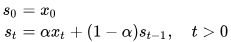

In [ ]:
#####################
# Your code goes here
#####################
def train_one_epoch_mod(
    dataloader: torch.utils.data.DataLoader,
    model: nn.Module,
    loss_fn: nn.Module,
    optimizer: optim.Optimizer,
    loss_print_iter: int=100
  ) -> dict:

  num_train_samples = len(dataloader.dataset)
  num_batches = len(dataloader)
  ema_alpha = 0.9

  train_losses = []
  train_accs = []
  train_losses_ema = []
  train_accs_ema = []

  train_loss_ema = None
  train_acc_ema = None
  # Set the model to the training mod
  model.train()

  for batch_index, (image, label) in enumerate(dataloader):

    image, label = image.to(device), label.to(device)

    # Compute prediction error
    pred = model(image)
    loss = loss_fn(pred, label)
    correct = (pred.argmax(1) == label).type(torch.float).sum().item()

    train_loss = loss.item()
    train_acc = correct / image.shape[0]

     # Clear gradient for next iterations.
    optimizer.zero_grad()

    # Backpropagation

    # Computes gradients of the loss with respect to all parameters
    # in the model that require gradients, storing them in the .grad
    # attribute of each parameter.
    loss.backward()

    # Updates all the model parameters using the gradients computed in the
    # previous step, moving parameters in the direction that reduces the
    # loss.
    optimizer.step()

    if train_loss_ema is None:
      train_loss_ema = train_loss
      train_acc_ema = train_acc
    else:
      train_loss_ema = ema_alpha * train_loss_ema + (1 - ema_alpha) * train_loss
      train_acc_ema = ema_alpha * train_acc_ema + (1 - ema_alpha) * train_acc

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    train_losses_ema.append(train_loss_ema)
    train_accs_ema.append(train_acc_ema)

    if batch_index % loss_print_iter == 0:
      trained_samples = (batch_index + 1) * image.shape[0]
      print(f'loss: {train_loss:>7f} loss_EMA: {train_loss_ema:>7f} \n'
            f'Accuracy: {(100*train_acc):>0.1f}% Accuracy_EMA: {100*train_acc_ema:>0.1f}%'
            f'[{trained_samples:>5d}/{num_train_samples:>5d}] '
            )

  return {
        'losses': train_losses,
        'accs': train_accs,
        'losses_ema': train_losses_ema,
        'accs_ema': train_accs_ema}

def test_all_samples_mod(
    dataloader: torch.utils.data.DataLoader,
    model: nn.Module,
    loss_fn: nn.Module
) -> dict:
  model.eval()  # Set the model to evaluation mode
  num_testing_samples = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0
  test_losses = []
  test_accs = []

  # Disable gradient calculation for inference
  with torch.no_grad():
    for image, label in dataloader:
      image, label = image.to(device), label.to(device)
      pred = model(image)
      test_loss += loss_fn(pred, label).item()
      correct += (pred.argmax(1) == label).type(torch.float).sum().item()

      test_losses.append(loss_fn(pred, label).item())
      test_accs.append((pred.argmax(1) == label).type(torch.float).
                       sum().item() / image.shape[0])

  test_loss /= num_batches
  correct /= num_testing_samples
  print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, '
        f'Avg loss: {test_loss:>8f} \n')
  return {
         'test_losses': test_losses,
         'test_accs': test_accs
         }

model = MLPNetwork().to(device)
epochs = 3   # Number of training epochs
optimizer = torch.optim.SGD(
  model.parameters(),    # All trainable parameters.
  lr=1e-4                # Learning rate
)

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  # Run one training epoch
  train_mat = train_one_epoch_mod(train_loader, model, loss_fn, optimizer)
  # After each epoch, run testing on all samples
  test_mat = test_all_samples_mod(test_loader, model, loss_fn)

print("Training done!")

Epoch 1
-------------------------------
loss: 2.387267 loss_EMA: 2.387267 
Accuracy: 6.2% Accuracy_EMA: 6.2%[   64/60000] 
loss: 2.325640 loss_EMA: 2.299701 
Accuracy: 7.8% Accuracy_EMA: 10.9%[ 6464/60000] 
loss: 2.270156 loss_EMA: 2.231343 
Accuracy: 9.4% Accuracy_EMA: 11.8%[12864/60000] 
loss: 2.229242 loss_EMA: 2.175753 
Accuracy: 10.9% Accuracy_EMA: 14.6%[19264/60000] 
loss: 2.102417 loss_EMA: 2.098182 
Accuracy: 20.3% Accuracy_EMA: 21.8%[25664/60000] 
loss: 2.037508 loss_EMA: 2.048013 
Accuracy: 37.5% Accuracy_EMA: 27.3%[32064/60000] 
loss: 2.004077 loss_EMA: 2.003280 
Accuracy: 28.1% Accuracy_EMA: 33.4%[38464/60000] 
loss: 1.908472 loss_EMA: 1.937588 
Accuracy: 35.9% Accuracy_EMA: 43.1%[44864/60000] 
loss: 1.939135 loss_EMA: 1.900557 
Accuracy: 42.2% Accuracy_EMA: 46.0%[51264/60000] 
loss: 1.843021 loss_EMA: 1.855650 
Accuracy: 46.9% Accuracy_EMA: 48.8%[57664/60000] 
Test Error: 
 Accuracy: 51.0%, Avg loss: 1.844371 

Epoch 2
-------------------------------
loss: 1.857385 loss_EM

In the next, plot the following 3 curves in the single plot:
* `train_acc`
* `train_acc_ema`
* `test_acc`
Note that `train_acc` is very noisy. Tune the parameter of ema to make the `train_acc_ema`

x-axis should be iteration. Note that `test_acc` has much less samples compared with `train_acc`.

Hint: When plot a curve, you can use `plt.plot(x, y)`

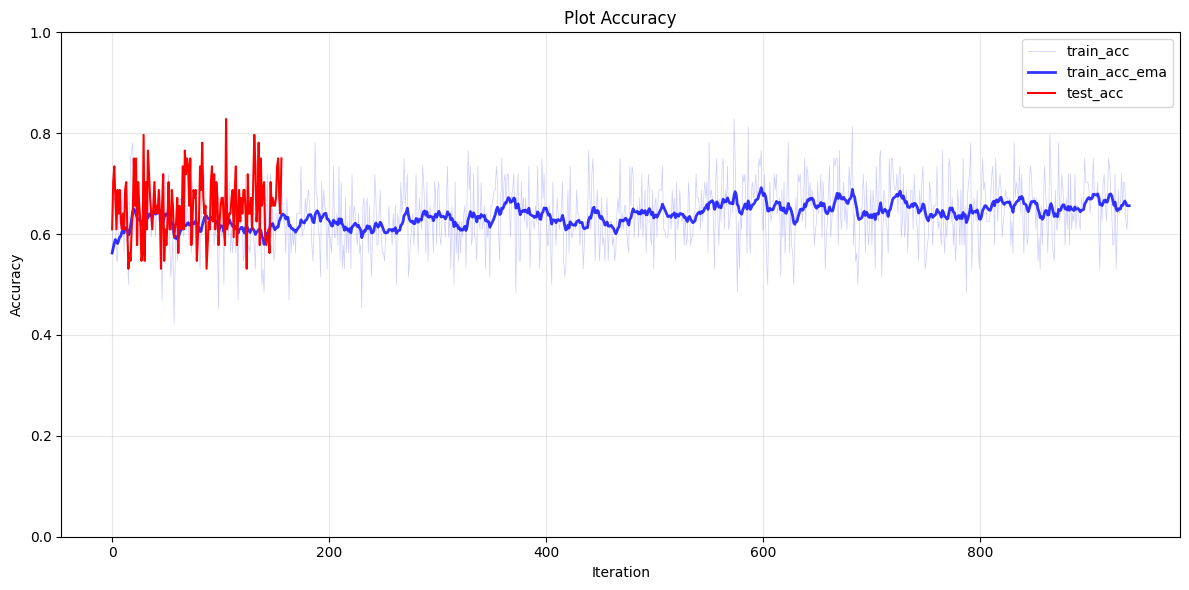

In [ ]:
#####################
# Your code goes here
#####################
def plot_acc(train_metrics: dict, test_metrics: dict):
    """
    Plot training accuracy, EMA training accuracy, and test accuracy in one plot.

    Args:
        train_metrics: Dictionary containing accuracies and accuracies_ema lists
        test_metrics: Dictionary containing test accuracies
    """
    plt.figure(figsize = (12, 6))

    # Extract training data
    train_acc = train_metrics['accs']
    train_acc_ema = train_metrics['accs_ema']
    train_iterations = range(len(train_acc))

    # Extract test data
    test_acc = test_metrics['test_accs']
    test_iterations = range(len(test_acc))

    # Plot
    plt.plot(train_iterations, train_acc,
             color='blue', alpha=0.2, linewidth=0.5, label='train_acc')

    plt.plot(train_iterations, train_acc_ema,
             color='blue', alpha=0.8, linewidth=2, label='train_acc_ema')

    plt.plot(test_iterations, test_acc,
             color='red', linewidth=1.5,
             label='test_acc')

    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Plot Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

    plt.tight_layout()
    plt.show()

plot_acc(train_mat, test_mat)

Similarly, plot the following 3 curves :
* `train_loss`
* `train_loss_ema`
* `test_loss`

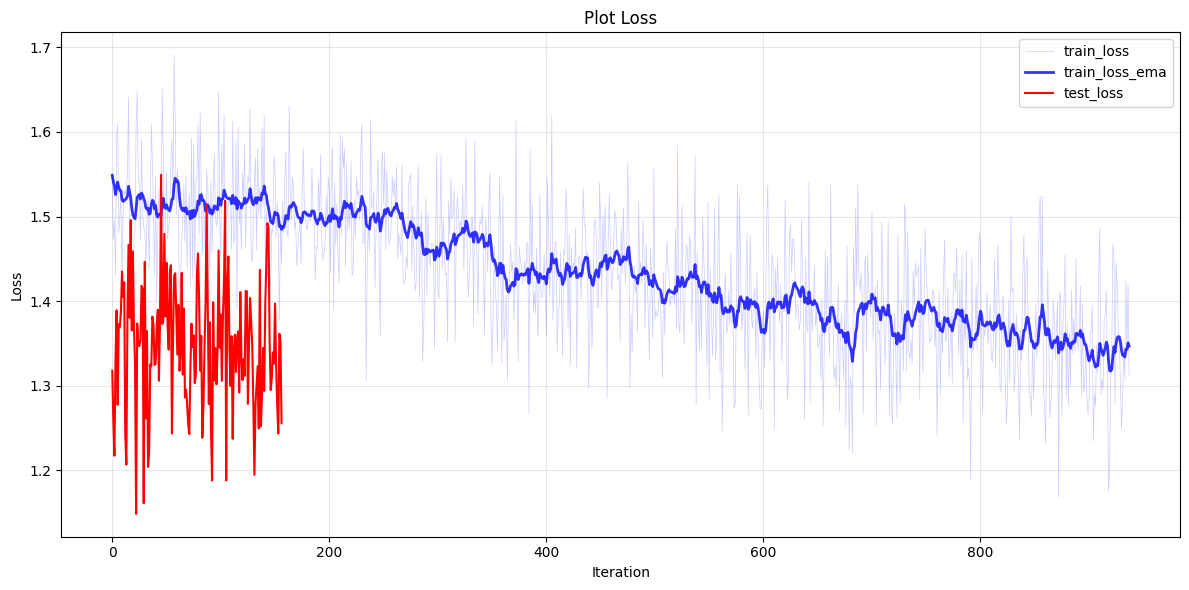

In [ ]:
#####################
# Your code goes here
#####################
def plot_loss(train_metrics: dict, test_metrics: dict):
    """
    Plot training loss, EMA training loss, and test loss in one plot.

    Args:
        train_metrics: Dictionary containing losses and losses_ema lists
        test_metrics: Dictionary containing test losses
    """
    plt.figure(figsize = (12, 6))

    # Extract training data
    train_loss = train_metrics['losses']
    train_loss_ema = train_metrics['losses_ema']
    train_iterations = range(len(train_loss))

    # Extract test data
    test_loss = test_metrics['test_losses']
    test_iterations = range(len(test_loss))

    # Plot
    plt.plot(train_iterations, train_loss,
             color='blue', alpha=0.2, linewidth=0.5, label='train_loss')

    plt.plot(train_iterations, train_loss_ema,
             color='blue', alpha=0.8, linewidth=2, label='train_loss_ema')

    plt.plot(test_iterations, test_loss,
             color='red', linewidth=1.5,
             label='test_loss')

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_loss(train_mat, test_mat)

## Question B.5. Improve the model accuracy.

This model is definitely not the best. Can you try to make some changes to improve the accuracy. You could try:
* Add more layers
* Change intermediate channel number
* Change epochs
* Change learning rate
* ...

With some tunings, you may be able to achieve about 87% accuracy (with more careful design, it could reach 88% or higher).

Still, if you cannot achieve 87%, you can stead record 2-3 models you have tried (including the print output of each each training). If you achieved 87%, just keep the model that achieves it.

You shall achieve a reasonable result with less than 7 min training on CPU.

In [ ]:
class MLPNetwork2(nn.Module):
  #####################
  # Your code goes here
  #####################
  def __init__(self):
    super().__init__()
    # Flatten the 28x28 image into a 784-element vector
    self.flatten = nn.Flatten()
    # Define a MLP model here
    self.mlp = nn.Sequential(
      nn.Linear(784, 256),
      nn.ReLU(),
      nn.BatchNorm1d(256),
      nn.Dropout(0.2),
      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.BatchNorm1d(128),
      nn.Linear(128, 10)
    )
  def forward(self, x):
    # Pass the input through the layers
    x = self.flatten(x)
    logits = self.mlp(x)
    return logits

model_v2 = MLPNetwork2().to(device)
print('==== This is the model we created ====')
print(model_v2)


==== This is the model we created ====
MLPNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (mlp): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Linear(in_features=128, out_features=10, bias=True)
  )
)


And rerun your training and test below.

In [ ]:
#####################
# Your code goes here
#####################
model_v2 = MLPNetwork2().to(device)
epochs = 5   # Number of training epochs
optimizer = torch.optim.AdamW(model_v2.parameters(),
                              lr = 1e-3,
                              weight_decay = 1e-4)

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  # Run one training epoch
  train_one_epoch(train_loader, model_v2, loss_fn, optimizer)
  # After each epoch, run testing on all samples
  test_all_samples(test_loader, model_v2, loss_fn)

print("Training done!")

Epoch 1
-------------------------------
loss: 2.378374 [   64/60000] 
loss: 0.463750 [ 6464/60000] 
loss: 0.478781 [12864/60000] 
loss: 0.440814 [19264/60000] 
loss: 0.546799 [25664/60000] 
loss: 0.548122 [32064/60000] 
loss: 0.322984 [38464/60000] 
loss: 0.434670 [44864/60000] 
loss: 0.379934 [51264/60000] 
loss: 0.299955 [57664/60000] 
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.415622 

Epoch 2
-------------------------------
loss: 0.298125 [   64/60000] 
loss: 0.500461 [ 6464/60000] 
loss: 0.367037 [12864/60000] 
loss: 0.467190 [19264/60000] 
loss: 0.260467 [25664/60000] 
loss: 0.449671 [32064/60000] 
loss: 0.552479 [38464/60000] 
loss: 0.274401 [44864/60000] 
loss: 0.337383 [51264/60000] 
loss: 0.462108 [57664/60000] 
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.415852 

Epoch 3
-------------------------------
loss: 0.297417 [   64/60000] 
loss: 0.443459 [ 6464/60000] 
loss: 0.463300 [12864/60000] 
loss: 0.280324 [19264/60000] 
loss: 0.226570 [25664/60000] 
loss: 0.465478 [32064/6000

After training, run the test below. Do not change it.

In [ ]:
test_all_samples(test_loader, model_v2, loss_fn)

Test Error: 
 Accuracy: 87.0%, Avg loss: 0.398471 



## Question B.6. Bonus. CNN.

Although we have not talk about CNN yet, but you can try to train a multi-layer CNN.

It is not easy to achieve much higher accuracy using CNN on FashionMNIST (compared to B5), but you shall reduce parameters.

Hint:
* You can try to use nn.Conv2d to create conv layer and nn.MaxPool2d to create a pooling layer.

In [28]:
class MLPNetwork3(nn.Module):
  #####################
  # Your code goes here
  #####################
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    # Define a conv model here
    self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
    self.conv2 = nn.Conv2d(6, 15, 5, padding=2)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(735, 128)
    self.fc2 = nn.Linear(128, 84)
    self.fc = nn.Linear(84, 10)
  def forward(self, x):
    # Pass the input through the layers
    x = self.pool(nn.functional.relu(self.conv1(x)))
    x = self.pool(nn.functional.relu(self.conv2(x)))
    x = self.flatten(x)
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    logits = self.fc(x)
    return logits

model_v3 = MLPNetwork3().to(device)
print('==== This is the model we created ====')
print(model_v3)

==== This is the model we created ====
MLPNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 15, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=735, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=84, bias=True)
  (fc): Linear(in_features=84, out_features=10, bias=True)
)


In [29]:
print(f'There are {calc_model_params(model_v3)} parameters in this model')

There are 108315 parameters in this model


And rerun your training.

In [30]:
#####################
# Your code goes here
#####################
model_v3 = MLPNetwork3().to(device)
epochs = 5   # Number of training epochs
optimizer = torch.optim.AdamW(model_v3.parameters(),
                              lr = 1e-3,
                              weight_decay = 1e-4)

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  # Run one training epoch
  train_one_epoch(train_loader, model_v3, loss_fn, optimizer)
  # After each epoch, run testing on all samples
  test_all_samples(test_loader, model_v3, loss_fn)

print("Training done!")


Epoch 1
-------------------------------
loss: 2.295143 [   64/60000] 
loss: 0.745136 [ 6464/60000] 
loss: 0.507666 [12864/60000] 
loss: 0.534038 [19264/60000] 
loss: 0.606405 [25664/60000] 
loss: 0.450362 [32064/60000] 
loss: 0.318436 [38464/60000] 
loss: 0.381810 [44864/60000] 
loss: 0.400856 [51264/60000] 
loss: 0.452404 [57664/60000] 
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.393469 

Epoch 2
-------------------------------
loss: 0.365129 [   64/60000] 
loss: 0.223563 [ 6464/60000] 
loss: 0.450623 [12864/60000] 
loss: 0.648995 [19264/60000] 
loss: 0.316874 [25664/60000] 
loss: 0.343357 [32064/60000] 
loss: 0.299718 [38464/60000] 
loss: 0.419201 [44864/60000] 
loss: 0.353309 [51264/60000] 
loss: 0.249413 [57664/60000] 
Test Error: 
 Accuracy: 87.0%, Avg loss: 0.369026 

Epoch 3
-------------------------------
loss: 0.246635 [   64/60000] 
loss: 0.311933 [ 6464/60000] 
loss: 0.234036 [12864/60000] 
loss: 0.351172 [19264/60000] 
loss: 0.152695 [25664/60000] 
loss: 0.295135 [32064/6000

After training, run the test below. Do not change it.

In [ ]:
test_all_samples(test_loader, model_v2, loss_fn)

Test Error: 
 Accuracy: 87.0%, Avg loss: 0.398471 



After training, print the network parameters, and run the test below.

In [31]:
print(f'There are {calc_model_params(model_v3)} parameters in this model')

test_all_samples(test_loader, model_v3, loss_fn)

There are 108315 parameters in this model
Test Error: 
 Accuracy: 89.7%, Avg loss: 0.288278 

